In [54]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [55]:
df = pd.read_csv('./news_crawling/result/main4.csv', encoding = 'cp949')

In [56]:
df

,제목,label
0,폭스바겐 전기차 목표 상향에…국내 배터리업체 바쁜 2020년 전망,2
1,포토 홈플러스 57 대용량 바구니 대여해드립니다,1
2,中인민은행 지준율 6일부터 0.5% 인하,2
3,과기부 윈도7 기술지원 종료 상황실 운영,2
4,저소득층 주거급여 지원 대상·금액 확대,0
...,...,...
3357770,그래픽 2019년 국가·가계·기업부채,1
3357771,박능후가 왜 거기서… 추석 인사 포스터에 들인 예산은,2
3357772,정치권 추석민심 해석 제각각…여야 원내대표 비공개 만찬,1
3357773,홍준표 文 향해 “쇼나 하고...수고 많다”,1


In [5]:
df.shape

(10000, 2)

In [6]:
df.isnull().sum()

제목       0
label    0
dtype: int64

In [7]:
df['제목'][0]

'폭스바겐 전기차 목표 상향에…국내 배터리업체 바쁜 2020년 전망'

!pip install konlpy==0.5.2 jpype1 Jpype1-py3

In [57]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub(' ', text)
    result = re.sub(' +', ' ', result)
    return result

In [58]:
df['제목'][0]

'폭스바겐 전기차 목표 상향에…국내 배터리업체 바쁜 2020년 전망'

In [59]:
apply_regular_expression(df['제목'][0])

'폭스바겐 전기차 목표 상향에 국내 배터리업체 바쁜 년 전망'

In [60]:
from konlpy.tag import Okt
from collections import Counter

In [61]:
import tweepy

tweepy.__version__

'3.10.0'

In [62]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df['제목'][0]))
nouns

['폭스바겐', '전기차', '목표', '상향', '국내', '배터리', '업체', '년', '전망']

In [56]:
# corpus = "".join(df['제목'].tolist())
# corpus

KeyError: 'text'

In [57]:
# 정규 표현식 적용
# apply_regular_expression(corpus)

NameError: name 'corpus' is not defined

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

In [ ]:
counter = Counter(nouns)

In [ ]:
counter.most_common(10)

In [12]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

NameError: name 'counter' is not defined

In [63]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

def text_clearing(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub(' ', text)
    result = re.sub(' +', ' ', result)
    okt = Okt()
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]#한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]
    return nouns
vect = CountVectorizer(tokenizer = lambda x:text_clearing(x))
bow_vect = vect.fit_transform(df['제목'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

C:\Users\jeon\anaconda3\envs\stockpredict\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


MemoryError: Unable to allocate 2.44 TiB for an array with shape (3357775, 99774) and data type int64

In [65]:
word_list

['가가',
 '가가린',
 '가가와현',
 '가가호호',
 '가감',
 '가객',
 '가갸꾼',
 '가거도',
 '가거도항',
 '가건물',
 '가게',
 '가게무샤',
 '가격',
 '가격결정',
 '가격담합',
 '가격연동제',
 '가격파괴',
 '가격표',
 '가견',
 '가결',
 '가결의',
 '가경',
 '가경동',
 '가경자',
 '가경주항',
 '가계',
 '가계도',
 '가계부',
 '가계부채',
 '가계약',
 '가계조사',
 '가고시마',
 '가고시마현',
 '가곡',
 '가곡면',
 '가공',
 '가공업',
 '가공품',
 '가관',
 '가교',
 '가구',
 '가구야',
 '가구점',
 '가극',
 '가글',
 '가글이',
 '가금',
 '가금류',
 '가급',
 '가기',
 '가까스로',
 '가까이',
 '가끔',
 '가나',
 '가나가와현',
 '가나다',
 '가나다라',
 '가나안',
 '가난',
 '가난뱅이',
 '가남읍',
 '가내',
 '가넷',
 '가노버',
 '가농',
 '가뇽',
 '가늠',
 '가늠쇠',
 '가늠자',
 '가능',
 '가능도',
 '가능동',
 '가능성',
 '가능케',
 '가니메데',
 '가니스',
 '가다가',
 '가다랑어',
 '가다리',
 '가닥',
 '가담',
 '가당',
 '가대',
 '가덕대교',
 '가덕도',
 '가덕면',
 '가덕산',
 '가던스헬스',
 '가던트',
 '가던트헬스',
 '가데',
 '가데나',
 '가덴',
 '가도',
 '가독',
 '가독성',
 '가동',
 '가동성',
 '가두',
 '가두리',
 '가드',
 '가드닝',
 '가드레일',
 '가득',
 '가든',
 '가든파이브',
 '가등기',
 '가디',
 '가디건',
 '가디스',
 '가디언',
 '가디언즈',
 '가뜩이나',
 '가라',
 '가라데',
 '가라사대',
 '가라오케',
 '가라지',
 '가락',
 '가락국',
 '가락국기',
 '가락국수',
 '가락동',
 '가락시장',
 '가락시장역',
 '가락지

In [19]:
bow_vect.shape

(10000, 7541)

In [66]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 2,
 '가가린': 86,
 '가가와현': 2,
 '가가호호': 1,
 '가감': 9,
 '가객': 1,
 '가갸꾼': 53,
 '가거도': 6,
 '가거도항': 1,
 '가건물': 1,
 '가게': 2,
 '가게무샤': 1,
 '가격': 2,
 '가격결정': 28,
 '가격담합': 15,
 '가격연동제': 2,
 '가격파괴': 12,
 '가격표': 1,
 '가견': 5,
 '가결': 1,
 '가결의': 1,
 '가경': 1,
 '가경동': 2,
 '가경자': 1,
 '가경주항': 6,
 '가계': 1,
 '가계도': 4,
 '가계부': 1,
 '가계부채': 1,
 '가계약': 5,
 '가계조사': 5,
 '가고시마': 3,
 '가고시마현': 1,
 '가곡': 23,
 '가곡면': 4,
 '가공': 1,
 '가공업': 24,
 '가공품': 1,
 '가관': 1,
 '가교': 10,
 '가구': 1,
 '가구야': 1,
 '가구점': 1,
 '가극': 1,
 '가글': 1,
 '가글이': 2,
 '가금': 11,
 '가금류': 2,
 '가급': 3,
 '가기': 40,
 '가까스로': 8,
 '가까이': 2,
 '가끔': 17,
 '가나': 38,
 '가나가와현': 4,
 '가나다': 4,
 '가나다라': 15,
 '가나안': 1,
 '가난': 2,
 '가난뱅이': 1,
 '가남읍': 9,
 '가내': 2,
 '가넷': 65,
 '가노버': 1,
 '가농': 1,
 '가뇽': 2,
 '가늠': 3,
 '가늠쇠': 2,
 '가늠자': 2,
 '가능': 3,
 '가능도': 1,
 '가능동': 3,
 '가능성': 1,
 '가능케': 1,
 '가니메데': 7,
 '가니스': 18,
 '가다가': 3,
 '가다랑어': 1,
 '가다리': 2,
 '가닥': 1,
 '가담': 11,
 '가당': 2,
 '가대': 1,
 '가덕대교': 14,
 '가덕도': 1,
 '가덕면': 3,
 '가덕산': 1,
 '가던스헬스': 2,
 '가던트': 2,
 '가던트헬스': 3

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [68]:
#첫번째 리뷰ㅜ에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 90957)	0.4127884025830662
  (0, 70825)	0.33805127131745755
  (0, 70708)	0.33554592311456766
  (0, 54946)	0.3266980702118256
  (0, 41091)	0.4151751496972948
  (0, 33042)	0.3641627195017518
  (0, 27621)	0.3413155953759966
  (0, 6942)	0.2729892858825767


In [69]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 99774)
[[0. 0. 0. ... 0. 0. 0.]]


In [70]:
invert_index_vectorizer = {v:k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+ '...')

{90957: '폭스바겐', 70708: '전기차', 27621: '목표', 41091: '상향', 6942: '국내', 33042: '배터리', 54946: '업체', 70825...


<AxesSubplot:>

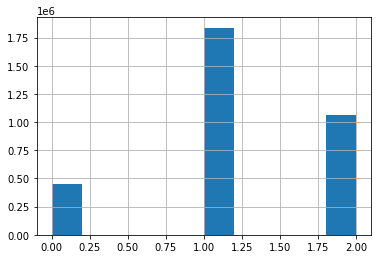

In [71]:
df['label'].hist()

In [72]:
def rating_to_label(rating):
    if rating == 2:
        return 1
    elif rating == 1:
        return 0
    
df['y'] = df['label'].apply(lambda x : rating_to_label(x))
        

In [73]:
df.head()

,제목,label,y
0,폭스바겐 전기차 목표 상향에…국내 배터리업체 바쁜 2020년 전망,2,1.0
1,포토 홈플러스 57 대용량 바구니 대여해드립니다,1,0.0
2,中인민은행 지준율 6일부터 0.5% 인하,2,1.0
3,과기부 윈도7 기술지원 종료 상황실 운영,2,1.0
4,저소득층 주거급여 지원 대상·금액 확대,0,NaN


In [74]:
df['y'].value_counts()

0.0    1836842
1.0    1066356
Name: y, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [34]:
tf_idf_vect

<10000x7541 sparse matrix of type '<class 'numpy.float64'>'
	with 63951 stored elements in Compressed Sparse Row format>

In [35]:
x_train.shape, y_train.shape

((7000, 7541), (7000,))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# classification result for test set
y_pred = lr.predict(x_test)

print('acuurancy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

acuurancy: 0.75


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [75]:
positive_random_idx = df[df['y']==1].sample(275, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, random_state=12).index.tolist()

In [76]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [77]:
x_train.shape, y_train.shape

((412, 99774), (412,))

In [78]:
x_test.shape, y_test.shape

((138, 99774), (138,))

In [79]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [80]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.65
precision: 0.62
recall: 0.76
F1: 0.68


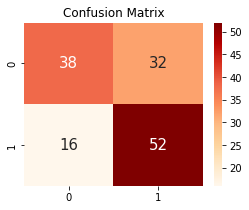

In [81]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

<BarContainer object of 99774 artists>

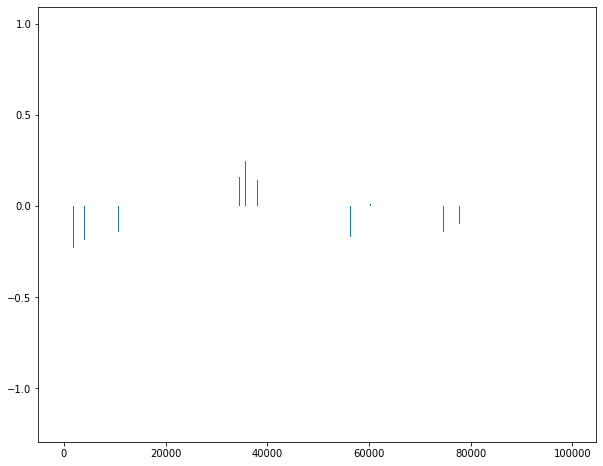

In [82]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [83]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

[(0.9836572806518229, 79885), (0.9150185356331447, 76060), (0.6978172578455363, 80959), (0.6211611826174888, 52285), (0.6078502700953015, 9082)]
[(-0.6273770788492502, 17504), (-0.6372749941567241, 32188), (-0.6908839230223498, 4123), (-0.8577246344868613, 90852), (-1.1844282797150636, 83319)]


In [84]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(0.9836572806518229, 79885),
 (0.9150185356331447, 76060),
 (0.6978172578455363, 80959),
 (0.6211611826174888, 52285),
 (0.6078502700953015, 9082),
 (0.6075544815246341, 72528),
 (0.5337961376986544, 87288),
 (0.5177581532930603, 94049),
 (0.5163066054746046, 81003),
 (0.49743800105672686, 35474),
 (0.4944133326314819, 11519),
 (0.4506121403188391, 80841),
 (0.43548322130310363, 25210),
 (0.41713028536277863, 57373),
 (0.4114515182645196, 35005),
 (0.40594492829874057, 51534),
 (0.39796387492536806, 39745),
 (0.38213509591371664, 41923),
 (0.37883439431150967, 13790),
 (0.37052627674279903, 95895),
 (0.36949546306742476, 68438),
 (0.3688783619734762, 81180),
 (0.36034081165549114, 73082),
 (0.35976909427382564, 49526),
 (0.357444473544313, 72775),
 (0.3556462739180059, 54341),
 (0.35483113550472517, 3106),
 (0.3539977699010315, 76776),
 (0.35322914102737035, 2086),
 (0.3519430253602003, 9323),
 (0.35131882394517266, 26966),
 (0.3482985779621522, 91316),
 (0.3481418277451123, 3325),
 (

In [85]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{90957: '폭스바겐',
 70708: '전기차',
 27621: '목표',
 41091: '상향',
 6942: '국내',
 33042: '배터리',
 54946: '업체',
 70825: '전망',
 90852: '포토',
 97035: '홈플러스',
 59607: '용량',
 30214: '바구니',
 17189: '대여',
 66775: '인민',
 63599: '은행',
 74997: '준율',
 67191: '인하',
 5231: '과기부',
 61722: '윈도',
 9288: '기술',
 76060: '지원',
 74215: '종료',
 41107: '상황',
 60335: '운영',
 44128: '소득',
 74481: '주거',
 8987: '급여',
 17109: '대상',
 8800: '금액',
 97785: '확대',
 11204: '김종갑',
 93869: '한전',
 39733: '사장',
 71249: '전통',
 48598: '시장',
 70680: '전기',
 39602: '사용',
 98707: '효율',
 39578: '사업',
 80732: '추진',
 75764: '지난해',
 46194: '수출',
 68486: '자릿수',
 92877: '하락',
 95942: '현대',
 57505: '오늘',
 41222: '새해',
 980: '감사',
 42591: '선물',
 40502: '삼성',
 31849: '반도체',
 5064: '공장',
 72408: '정전',
 92487: '피해',
 35540: '복구',
 3525: '경제',
 59900: '우리',
 58578: '올해',
 47045: '스마트',
 47647: '스튜디오',
 97146: '홍보',
 82835: '컨텐츠',
 73001: '제작',
 45765: '수도',
 38165: '비상',
 62637: '유통업',
 30064: '밀레',
 43490: '세대',
 69125: '잡기',
 79787: '총력전',
 80878: '춘절

In [108]:
positive = []
for coef in coef_pos_index:
    positive.append([invert_index_vectorizer[coef[1]], coef[0]])
    # print(invert_index_vectorizer[coef[1]], coef[0])
df_positive = pd.DataFrame(positive)
df_positive.columns=['title','percent']
df_positive.to_csv('./words/positive.csv')

In [109]:
negative = []
for coef in coef_neg_index:
    negative.append([invert_index_vectorizer[coef[1]], coef[0]])
df_negative = pd.DataFrame(negative)
df_negative.columns=['title','percent']
df_negative.to_csv('./words/negative.csv')

[(0.9836572806518229, 79885),
 (0.9150185356331447, 76060),
 (0.6978172578455363, 80959),
 (0.6211611826174888, 52285),
 (0.6078502700953015, 9082),
 (0.6075544815246341, 72528),
 (0.5337961376986544, 87288),
 (0.5177581532930603, 94049),
 (0.5163066054746046, 81003),
 (0.49743800105672686, 35474),
 (0.4944133326314819, 11519),
 (0.4506121403188391, 80841),
 (0.43548322130310363, 25210),
 (0.41713028536277863, 57373),
 (0.4114515182645196, 35005),
 (0.40594492829874057, 51534),
 (0.39796387492536806, 39745),
 (0.38213509591371664, 41923),
 (0.37883439431150967, 13790),
 (0.37052627674279903, 95895),
 (0.36949546306742476, 68438),
 (0.3688783619734762, 81180),
 (0.36034081165549114, 73082),
 (0.35976909427382564, 49526),
 (0.357444473544313, 72775),
 (0.3556462739180059, 54341),
 (0.35483113550472517, 3106),
 (0.3539977699010315, 76776),
 (0.35322914102737035, 2086),
 (0.3519430253602003, 9323),
 (0.35131882394517266, 26966),
 (0.3482985779621522, 91316),
 (0.3481418277451123, 3325),
 (